# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [3]:
model = HANCWelfareModelClass(name='baseline')

In [4]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [5]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = np.min([par.G_ss, par.L_G_ss*par.Gamma_G_ss])
ss.chi = 0.0
ss.G = 0.4

We can now solve and simulate:

In [6]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.3 secs [345 iterations]


In [7]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 5.2 secs [425 iterations]


And we can check whether the results make sort of sense:

In [8]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

model.ss.A_hh = 2.03
model.ss.L_hh = 1.06
model.ss.C_hh = 0.78


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.9 secs
household problem simulated along transition in 1.7 secs



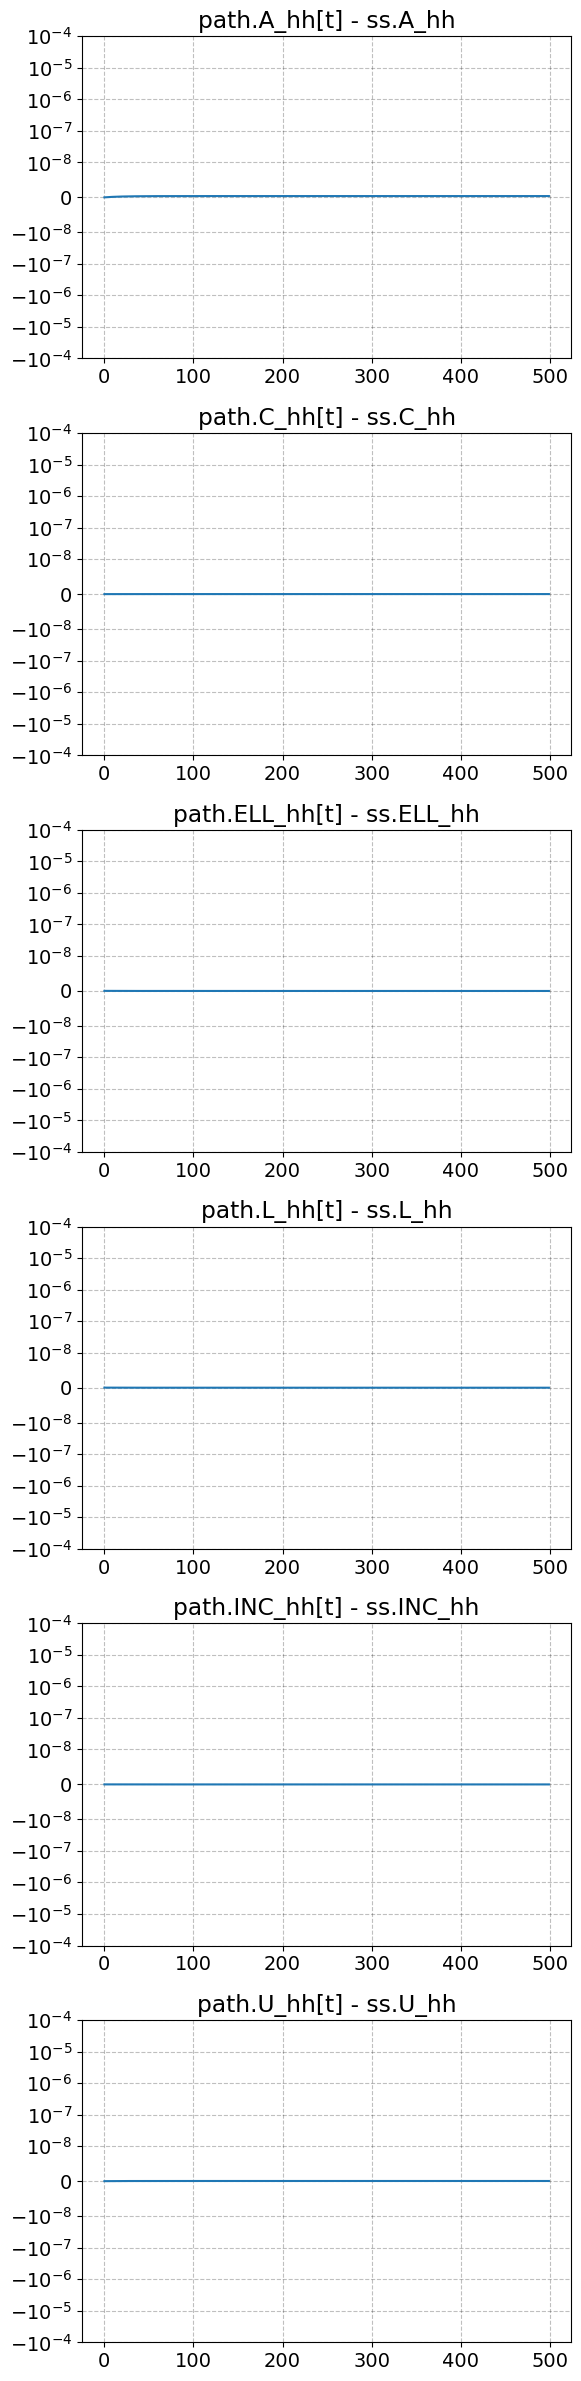

In [9]:
model.test_hh_path()

## 3. <a id='toc3_'></a>[Test 2: Evaluating the objective for finding the steady state](#toc0_)

We can try out various inputs and look at the outputs:

In [10]:
for KL in [2.0,3.0,4.0]:
    clearing_A = obj_ss(np.array([KL]),model,do_print=False)
    print(f'{KL = :.2f} -> {clearing_A = :12.8f}')

IndexError: index 1 is out of bounds for axis 0 with size 1

## 4. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

In [12]:
model.find_ss(do_print=True)

starting at KL = [3.8624] and tau = [0.0300]


/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/Assignment 2/steady_state.py:84: RuntimeWarning: invalid value encountered in scalar power
  ss.Y = par.Gamma_Y * ss.K**(par.alpha) * ss.L_Y**(1-par.alpha)



 message: The solution converged.
 success: True
  status: 1
     fun: [ 3.590e-01  4.248e-01]
       x: [ 3.862e+00 -1.513e-02]
    nfev: 26
    fjac: [[-1.000e+00  4.368e-09]
           [-4.368e-09 -1.000e+00]]
       r: [ 4.143e+06 -2.982e+08 -3.307e-01]
     qtf: [-3.590e-01 -4.248e-01]

steady state found in 6.9 secs
ss.K =  2.821
ss.B =  0.000
ss.A_hh =  2.342
ss.L_Y =  0.730
ss.L_G =  0.200
ss.G =  0.200
ss.tau = -0.015
ss.S =  0.200
ss.Y =  1.095
ss.r =  0.016
ss.w =  1.050
ss.clearing_A = 4.78e-01
ss.clearing_L = 1.87e-09
ss.clearing_Y = -4.17e-01
ss.clearing_G = 4.25e-01


## 5. <a id='toc5_'></a>[Grid search](#toc0_)

In [13]:
par.tau_ss = 0.0
KL_min = ((1/par.beta+par.delta-1)/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))
KL_max = (par.delta/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))

In [14]:
NKL = 10
KL_vec = np.hstack((np.linspace(KL_min+1e-2,KL_max-1e-2,NKL),np.linspace(KL_max+1e-2,10.0,NKL)))
clearing_A_vec = np.nan*np.ones(KL_vec.size)
r_vec = np.nan*np.ones(KL_vec.size)

model_ = model.copy()
for i,KL in enumerate(KL_vec):
    print(f'{KL = :6.2f}: ',end='')
    try:
        clearing_A_vec[i] = obj_ss(np.array([KL]),model_,do_print=False)
        r_vec[i] = model_.ss.r
        print(f'clearing_A = {clearing_A_vec[i]:16.8f}')
    except Exception as e:
        print(e)

KL =   2.93: index 1 is out of bounds for axis 0 with size 1
KL =   3.14: index 1 is out of bounds for axis 0 with size 1
KL =   3.34: index 1 is out of bounds for axis 0 with size 1
KL =   3.55: index 1 is out of bounds for axis 0 with size 1
KL =   3.76: index 1 is out of bounds for axis 0 with size 1
KL =   3.97: index 1 is out of bounds for axis 0 with size 1
KL =   4.17: index 1 is out of bounds for axis 0 with size 1
KL =   4.38: index 1 is out of bounds for axis 0 with size 1
KL =   4.59: index 1 is out of bounds for axis 0 with size 1
KL =   4.79: index 1 is out of bounds for axis 0 with size 1
KL =   4.81: index 1 is out of bounds for axis 0 with size 1
KL =   5.39: index 1 is out of bounds for axis 0 with size 1
KL =   5.97: index 1 is out of bounds for axis 0 with size 1
KL =   6.54: index 1 is out of bounds for axis 0 with size 1
KL =   7.12: index 1 is out of bounds for axis 0 with size 1
KL =   7.70: index 1 is out of bounds for axis 0 with size 1
KL =   8.27: index 1 is 

AttributeError: 'types.SimpleNamespace' object has no attribute 'L'

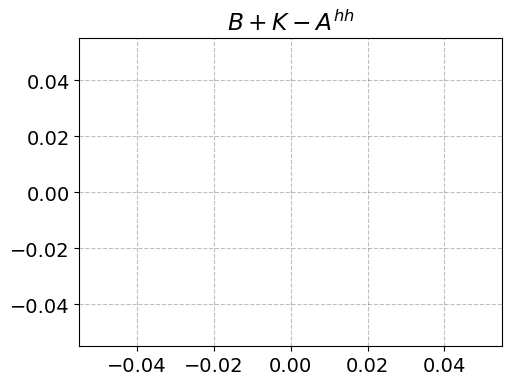

In [15]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('$B+K-A^{hh}$')
ax.plot(KL_vec[:NKL],clearing_A_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],clearing_A_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black')
ax.set_yscale('symlog')

ax = fig.add_subplot(1,2,2)
ax.set_title('$r$')
ax.plot(KL_vec[:NKL],r_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],r_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black');
ax.axhline(ss.r,color='black');

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

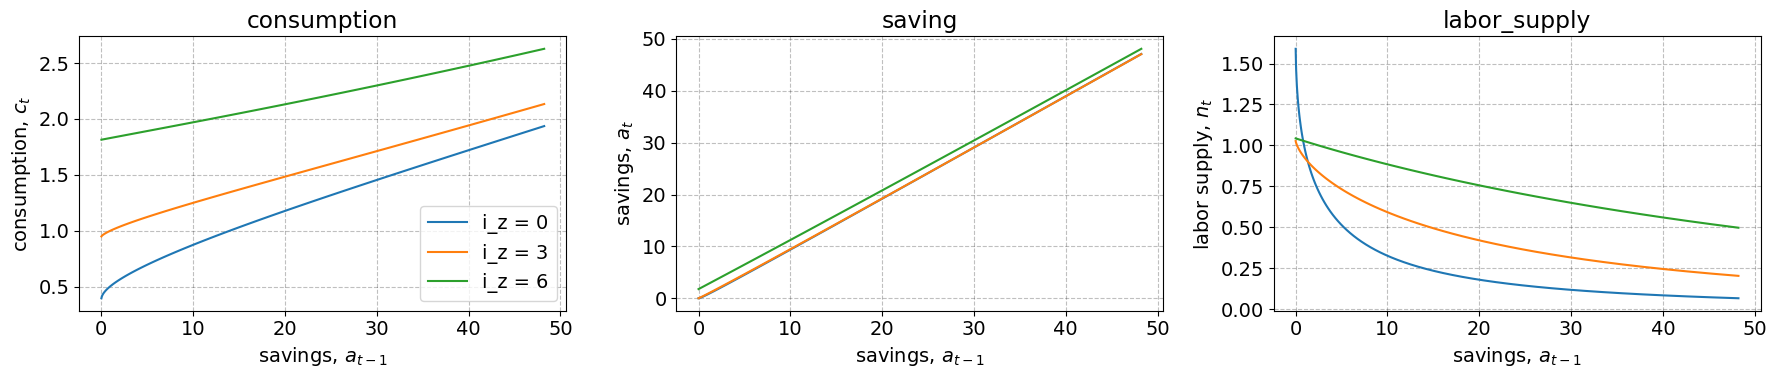

In [16]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

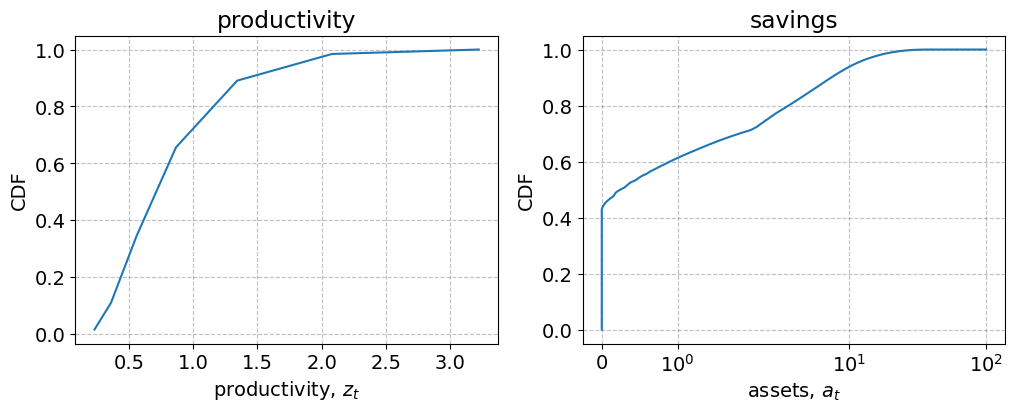

In [17]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [18]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

K              :       2.8206
L_Y            :       0.7303
rK             :       0.1165
w              :       1.0499
Y              :       1.0953
A              :       2.8206
r              :       0.0165
B              :       0.0000
tau            :      -0.0151
wt             :       1.0658
S              :       0.2000
G              :       0.2000
L_G            :       0.2000
Gamma_G        :       1.0000
chi            :       0.0000
A_hh           :       2.3424
C_hh           :       1.0301
ELL_hh         :       1.0033
L_hh           :       0.9303
INC_hh         :       1.0301
U_hh           :      -6.6217
I              :       0.2821
clearing_A     :       0.4783
clearing_L     :       0.0000
clearing_Y     :      -0.4169
clearing_G     :       0.4248


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.0 secs



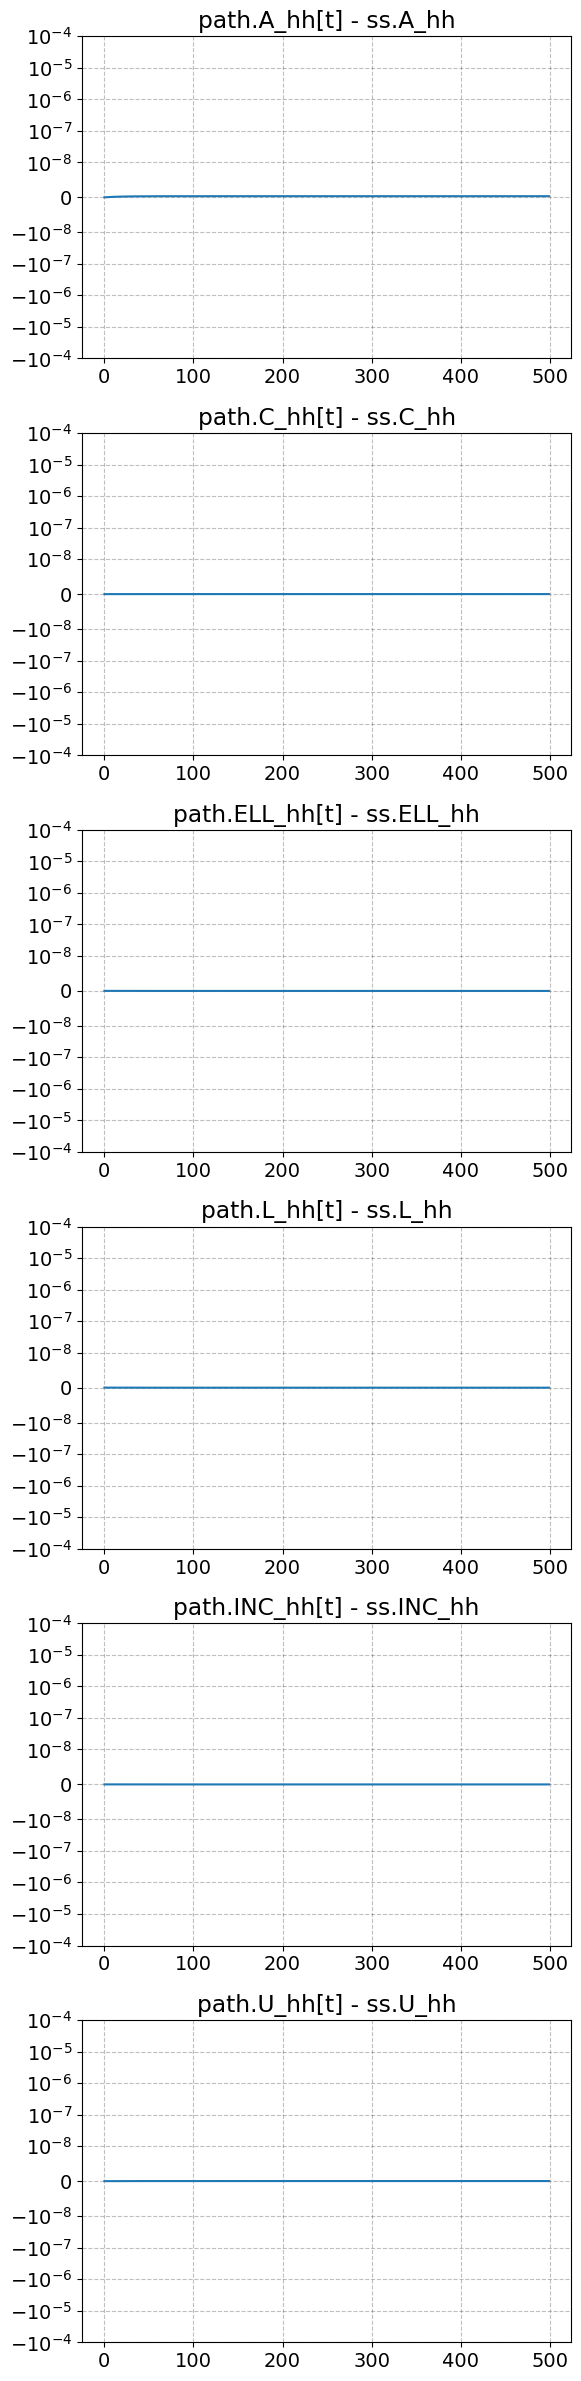

In [19]:
model.test_hh_path()

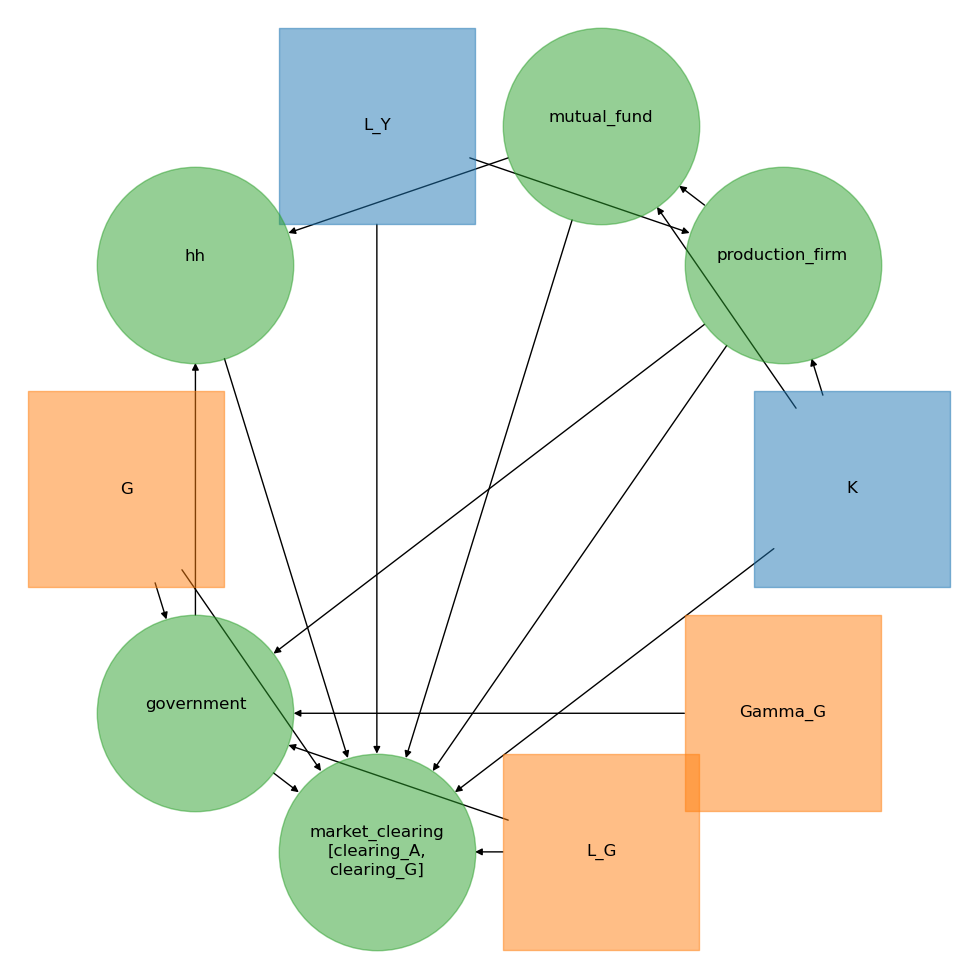

In [20]:
model.draw_DAG()

In [21]:
model.test_path(in_place=True)

shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               2.8e-17
 w                2.2e-16
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                2.8e-17
blocks.government
 B                0.0e+00
 tau              0.0e+00
 wt               2.2e-16
 S                0.0e+00
 chi              0.0e+00
hh
 A_hh             3.3e-10
 C_hh             1.0e-11
 ELL_hh           1.6e-11
 L_hh             1.4e-11
 INC_hh           9.3e-12
 U_hh             2.4e-11
blocks.market_clearing
 I                5.6e-17
 clearing_A       4.8e-01 [target]
 clearing_L       1.4e-11
 clearing_Y       1.0e-11
 clearing_G       4.2e-01 [target]


## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [22]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for S               in 0.6 secs
curly_Y and curly_D calculated for chi             in 0.5 secs
curly_Y and curly_D calculated for r               in 0.5 secs
curly_Y and curly_D calculated for wt              in 0.5 secs
curly_E calculated in 2.4 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 4.8 secs

full Jacobians:
full Jacobian to unknowns computed in 1.2 secs [in evaluate_blocks(): 0.6 secs]
full Jacobian to shocks computed in 1.5 secs [in evaluate_blocks(): 0.7 secs]


In [23]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 4.78e-01
   4.78e-01 in clearing_A
   4.25e-01 in clearing_G
 it =   1 -> max. abs. error = 9.84e+01
   9.84e+01 in clearing_A
   4.14e-01 in clearing_G
 it =   2 -> max. abs. error = 8.63e+01
   8.63e+01 in clearing_A
   4.02e-01 in clearing_G
 it =   3 -> max. abs. error = 8.84e+01
   8.84e+01 in clearing_A
   4.08e-01 in clearing_G
backtracking...
backtracking...
backtracking...


/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/Assignment 2/blocks.py:17: RuntimeWarning: invalid value encountered in power
  rK[:] = par.alpha*par.Gamma_Y*(K_lag/L_Y)**(par.alpha-1.0)
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/Assignment 2/blocks.py:18: RuntimeWarning: invalid value encountered in power
  w[:] = (1.0-par.alpha)*par.Gamma_Y*(K_lag/L_Y)**par.alpha
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/Assignment 2/blocks.py:21: RuntimeWarning: invalid value encountered in power
  Y[:] = par.Gamma_Y*K_lag**(par.alpha)*L_Y**(1-par.alpha)
/Users/juliekrabek/GEModelTools/GEModelTools/GEModelClass.py:1623: UserWarning: warning: variable rK contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/juliekrabek/GEModelTools/GEModelTools/GEModel

 it =   4 -> max. abs. error = 8.76e+01
   8.76e+01 in clearing_A
   4.15e-01 in clearing_G
 it =   5 -> max. abs. error = 8.65e+01
   8.65e+01 in clearing_A
   3.83e-01 in clearing_G


ValueError: GEModelTools: No improvement for 5 iterations

In [26]:
model.path.D

array([[[[1.48920918e-02, 3.77028806e-05, 3.32305972e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [8.43916467e-02, 4.93076463e-04, 3.80675616e-04, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.80101710e-01, 2.50278799e-03, 2.05551413e-03, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [8.27175860e-03, 3.83428722e-04, 2.77867122e-04, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.65822443e-04, 7.78295572e-06, 5.63614354e-06, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.11792656e-06, 5.28023005e-08, 3.82236011e-08, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]],


       [[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.02212261e-07, 3.02043050e-07, 6.26165150e-07],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.61016546e-06, 5.10413183e-06, 1.15742125e-05],
      